In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats
import seaborn as sns
import numpy as np

In [2]:
accuracy_matrix = pd.read_csv('accuracy_across_iterations.csv', header=None, index_col=0, delimiter=';')
accuracy_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi_CV,0.871225,0.924217,0.878917,0.900855,0.886895,0.871225,0.878632,0.909402,0.893732,0.894017,0.885755,0.878063,0.917094,0.908547,0.893162,0.871510,0.908547,0.886610,0.908547,0.894017
RF_SG_msi_test,0.852941,0.794118,0.882353,0.852941,0.882353,0.911765,0.911765,0.882353,0.882353,0.911765,0.941176,0.882353,0.823529,0.852941,0.823529,0.852941,0.852941,0.911765,0.882353,0.941176
XGB_SG_msi_CV,0.833333,0.863818,0.878917,0.862963,0.841026,0.833048,0.886040,0.894587,0.893447,0.863248,0.855271,0.871225,0.894587,0.870940,0.855271,0.855556,0.870940,0.863818,0.863248,0.855840
XGB_SG_msi_test,0.882353,0.735294,0.882353,0.852941,0.852941,0.970588,0.941176,0.852941,0.852941,0.911765,0.941176,0.911765,0.852941,0.852941,0.735294,0.852941,0.882353,0.882353,0.911765,0.941176
RF_SG_stage_CV,0.672727,0.794372,0.803463,0.738528,0.720779,0.655411,0.719481,0.671861,0.681818,0.680519,0.709957,0.654978,0.728571,0.728571,0.691775,0.710390,0.709957,0.701732,0.739827,0.692208
RF_SG_stage_test,0.814815,0.518519,0.703704,0.629630,0.703704,0.703704,0.666667,0.777778,0.814815,0.777778,0.629630,0.740741,0.703704,0.851852,0.851852,0.703704,0.703704,0.703704,0.629630,0.629630
XGB_SG_stage_CV,0.616450,0.793939,0.774892,0.700866,0.767532,0.654545,0.682684,0.699567,0.652814,0.662771,0.681818,0.670996,0.700433,0.664069,0.674459,0.719481,0.700866,0.784848,0.691775,0.711255
XGB_SG_stage_test,0.703704,0.481481,0.703704,0.777778,0.666667,0.629630,0.777778,0.814815,0.851852,0.814815,0.592593,0.629630,0.777778,0.814815,0.740741,0.666667,0.629630,0.666667,0.666667,0.703704
RF_SG_TL_CV,0.828659,0.808537,0.823171,0.779756,0.818659,0.804390,0.803780,0.799024,0.804024,0.843171,0.843171,0.803293,0.798780,0.803659,0.818902,0.808537,0.808902,0.819024,0.818415,0.867561


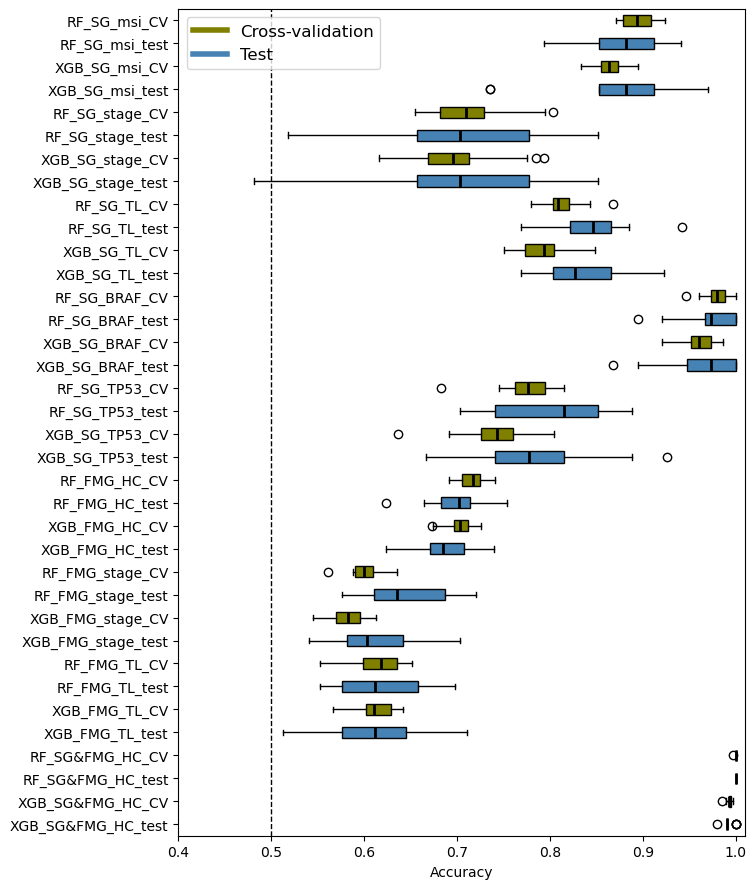

                Label  Median Value
0        RF_SG_msi_CV      0.893447
1      RF_SG_msi_test      0.882353
2       XGB_SG_msi_CV      0.863533
3     XGB_SG_msi_test      0.882353
4      RF_SG_stage_CV      0.709957
5    RF_SG_stage_test      0.703704
6     XGB_SG_stage_CV      0.695671
7   XGB_SG_stage_test      0.703704
8         RF_SG_TL_CV      0.808720
9       RF_SG_TL_test      0.846154
10       XGB_SG_TL_CV      0.794085
11     XGB_SG_TL_test      0.826923
12      RF_SG_BRAF_CV      0.980215
13    RF_SG_BRAF_test      0.973684
14     XGB_SG_BRAF_CV      0.960645
15   XGB_SG_BRAF_test      0.973684
16      RF_SG_TP53_CV      0.776190
17    RF_SG_TP53_test      0.814815
                 Label  Median Value
18      XGB_SG_TP53_CV      0.743290
19    XGB_SG_TP53_test      0.777778
20        RF_FMG_HC_CV      0.717499
21      RF_FMG_HC_test      0.702055
22       XGB_FMG_HC_CV      0.702881
23     XGB_FMG_HC_test      0.684932
24     RF_FMG_stage_CV      0.600281
25   RF_FMG_stage_te

In [3]:

df = accuracy_matrix.transpose()

train_color = 'olive'
test_color = 'steelblue'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 12

fig, ax = plt.subplots(figsize=(9, 9))  

bp = ax.boxplot(df.values, vert=False, patch_artist=True)

median_values = []

# Color the boxplots and extract median values
for i, (patch, median) in enumerate(zip(bp['boxes'], bp['medians'])):
    label = accuracy_matrix.index[i]
    if 'test' in label.lower():
        patch.set_facecolor(test_color)
    else:
        patch.set_facecolor(train_color)
 
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    median_value = median.get_xdata()[1]  # get_xdata() returns [x0, x1], we need x1
    median_values.append(median_value)

ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
ax.set_yticklabels(accuracy_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('Accuracy', fontsize=label_fontsize)
ax.invert_yaxis()

handles = [plt.Line2D([0], [0], color=train_color, lw=4),
           plt.Line2D([0], [0], color=test_color, lw=4)]
labels = ['Cross-validation', 'Test']
legend = ax.legend(handles, labels, loc='upper left',fontsize=legend_fontsize)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

median_df = pd.DataFrame({
    'Label': accuracy_matrix.index,
    'Median Value': median_values
})
pd.set_option('display.max_rows', None)

print(median_df[0:18])
print(median_df[18:36])

In [4]:
for i, j in zip(range(0, 35, 2), range(1, 36, 2)):
    one_row = accuracy_matrix.iloc[i]
    other_row = accuracy_matrix.iloc[j]
    
    # Calculate t-test
    t, p = ttest_ind(one_row, other_row)
    
    # Print the result
    print(f"Rows {i} vs {j} - P-value: {p:.3e}")

Rows 0 vs 1 - P-value: 8.550e-02
Rows 2 vs 3 - P-value: 4.973e-01
Rows 4 vs 5 - P-value: 9.012e-01
Rows 6 vs 7 - P-value: 8.216e-01
Rows 8 vs 9 - P-value: 1.617e-02
Rows 10 vs 11 - P-value: 5.095e-04
Rows 12 vs 13 - P-value: 3.960e-01
Rows 14 vs 15 - P-value: 8.004e-01
Rows 16 vs 17 - P-value: 1.379e-01
Rows 18 vs 19 - P-value: 6.487e-03
Rows 20 vs 21 - P-value: 3.154e-02
Rows 22 vs 23 - P-value: 1.907e-02
Rows 24 vs 25 - P-value: 5.286e-04
Rows 26 vs 27 - P-value: 1.002e-02
Rows 28 vs 29 - P-value: 9.264e-01
Rows 30 vs 31 - P-value: 7.550e-01
Rows 32 vs 33 - P-value: 3.236e-01
Rows 34 vs 35 - P-value: 2.559e-01


c:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [5]:
auroc_matrix = pd.read_csv('auroc_across_iterations.csv', header=None, index_col=0, delimiter=';')
auroc_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SG_msi,0.968858,0.833910,0.922145,0.993080,0.968858,0.993080,0.961938,0.958478,0.944637,0.993080,1.000000,0.948097,0.901384,0.904844,0.916955,0.942907,0.920415,0.961938,0.953287,0.958478
XGB_SG_msi,0.923875,0.809689,0.889273,0.916955,0.955017,0.996540,0.955017,0.934256,0.910035,0.927336,0.955017,0.968858,0.847751,0.913495,0.851211,0.944637,0.944637,0.944637,0.972318,0.906574
RF_SG_stage,0.815934,0.549451,0.818681,0.785714,0.854396,0.730769,0.804945,0.895604,0.884615,0.884615,0.653846,0.684066,0.733516,0.851648,0.890110,0.782967,0.873626,0.771978,0.645604,0.741758
XGB_SG_stage,0.890110,0.560440,0.758242,0.851648,0.780220,0.736264,0.840659,0.884615,0.895604,0.868132,0.554945,0.708791,0.752747,0.923077,0.807692,0.708791,0.741758,0.747253,0.730769,0.763736
RF_SG_TL,0.968573,0.956724,0.985272,0.997736,0.980829,0.960018,0.961803,0.977802,0.986310,0.978373,0.973016,0.983010,0.942749,0.974070,0.970829,0.973650,0.972127,0.975173,0.971239,0.958424
XGB_SG_TL,0.973141,0.969729,0.989855,0.996830,0.989579,0.968733,0.961318,0.974288,0.986568,0.975794,0.974944,0.965399,0.969250,0.977467,0.941080,0.979602,0.968961,0.972313,0.956401,0.952131
RF_SG_BRAF,1.000000,0.983380,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.988920,1.000000,1.000000,1.000000,0.979224,1.000000,0.980609,0.983380,1.000000,1.000000,0.991690,0.997230
XGB_SG_BRAF,0.991690,0.991690,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.991690,1.000000,1.000000,1.000000,0.930748,1.000000,0.986150,0.994460,1.000000,0.994460,0.997230,0.997230
RF_SG_TP53,0.843407,0.796703,0.934066,0.895604,0.810440,0.945055,0.923077,0.945055,0.939560,0.950549,0.840659,0.840659,0.901099,0.868132,0.854396,0.752747,0.857143,0.810440,0.901099,0.945055


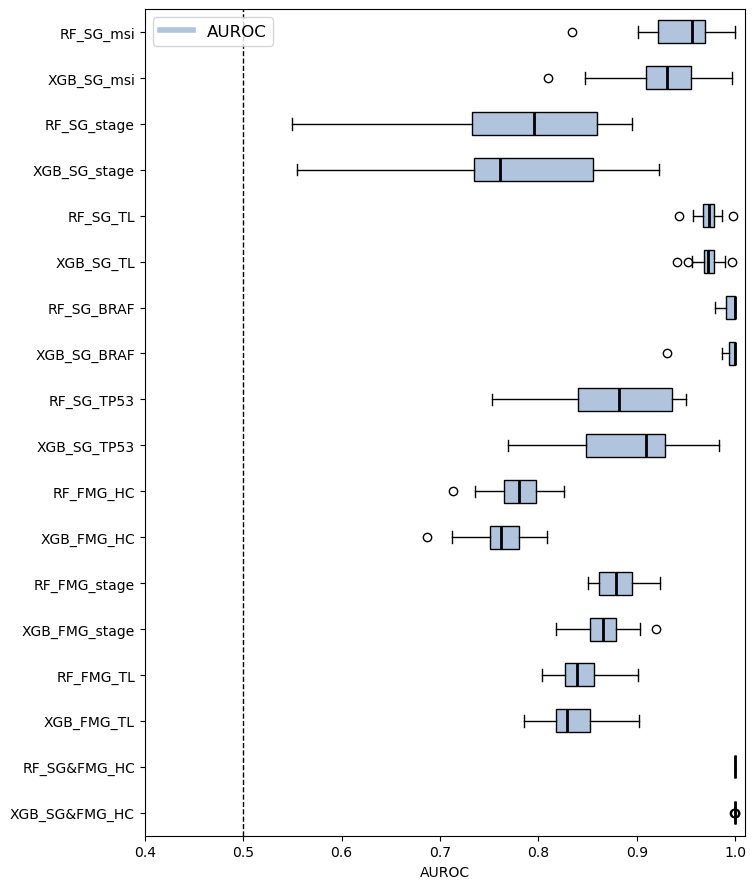

            Label  Median Value
0       RF_SG_msi      0.955882
1      XGB_SG_msi      0.930796
2     RF_SG_stage      0.795330
3    XGB_SG_stage      0.760989
4        RF_SG_TL      0.973333
5       XGB_SG_TL      0.972727
6      RF_SG_BRAF      1.000000
7     XGB_SG_BRAF      1.000000
8      RF_SG_TP53      0.881868
9     XGB_SG_TP53      0.909341
10      RF_FMG_HC      0.779977
11     XGB_FMG_HC      0.761588
12   RF_FMG_stage      0.878593
13  XGB_FMG_stage      0.865431
14      RF_FMG_TL      0.839393
15     XGB_FMG_TL      0.829524
16   RF_SG&FMG_HC      1.000000
17  XGB_SG&FMG_HC      1.000000


In [6]:
df1 = auroc_matrix.transpose()

box_color = 'lightsteelblue'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 12

fig, ax = plt.subplots(figsize=(9, 9)) 

bp = ax.boxplot(df1.values, vert=False, patch_artist=True)

median_values=[]

for box in bp['boxes']:
    box.set_facecolor(box_color)

for median in bp['medians']:
    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    median_value = median.get_xdata()[1] 
    median_values.append(median_value)

ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
ax.set_yticklabels(auroc_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('AUROC', fontsize=label_fontsize)
ax.invert_yaxis()

handles = [plt.Line2D([0], [0], color=box_color, lw=4)]
labels = ['AUROC']
legend = ax.legend(handles, labels, loc='upper left', fontsize=legend_fontsize)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

median_df = pd.DataFrame({
    'Label': auroc_matrix.index,
    'Median Value': median_values
})

pd.set_option('display.max_rows', None)
print(median_df)

In [9]:
for i, j in zip(range(0, 18, 2), range(1, 19, 2)):
    one_row = auroc_matrix.iloc[i]
    other_row = auroc_matrix.iloc[j]
    
    # Calculate t-test
    t, p = ttest_ind(one_row, other_row)
    
    # Print the result
    print(f"Rows {i} vs {j} - P-value: {p:.3e}")

Rows 0 vs 1 - P-value: 8.488e-02
Rows 2 vs 3 - P-value: 8.118e-01
Rows 4 vs 5 - P-value: 9.575e-01
Rows 6 vs 7 - P-value: 7.069e-01
Rows 8 vs 9 - P-value: 5.272e-01
Rows 10 vs 11 - P-value: 9.939e-02
Rows 12 vs 13 - P-value: 7.045e-02
Rows 14 vs 15 - P-value: 3.594e-01
Rows 16 vs 17 - P-value: 1.269e-01


c:\Anaconda\Lib\site-packages\scipy\stats\_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


In [17]:
SGGE_matrix = pd.read_csv('SGGE_across_iterations.csv', header=None, index_col=0, delimiter=';')
SGGE_matrix

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
0,,,,,,,,,,,,,,,,,,,,
RF_SGGE_msi_CV,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992857,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.992857,1.000000,1.000000,1.000000,1.000000
RF_SGGE_msi_test,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RF_SGGE_msi_AUROC,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
RF_SGGE_msi_F1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGB_SGGE_msi_CV,0.978307,0.985714,1.000000,0.992857,0.985714,0.978571,0.992857,0.985714,0.978571,0.978571,0.978571,0.992857,0.985714,0.992593,0.978571,0.964286,0.964286,0.978571,0.992593,0.985714
XGB_SGGE_msi_test,1.000000,0.971429,0.971429,1.000000,0.942857,1.000000,1.000000,1.000000,0.914286,1.000000,0.971429,0.971429,0.942857,1.000000,1.000000,1.000000,1.000000,0.971429,1.000000,1.000000
XGB_SGGE_msi_AUROC,1.000000,1.000000,1.000000,1.000000,0.996732,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
XGB_SGGE_msi_F1,1.000000,0.972973,0.969697,1.000000,0.941176,1.000000,1.000000,1.000000,0.923077,1.000000,0.971429,0.971429,0.947368,1.000000,1.000000,1.000000,1.000000,0.972973,1.000000,1.000000


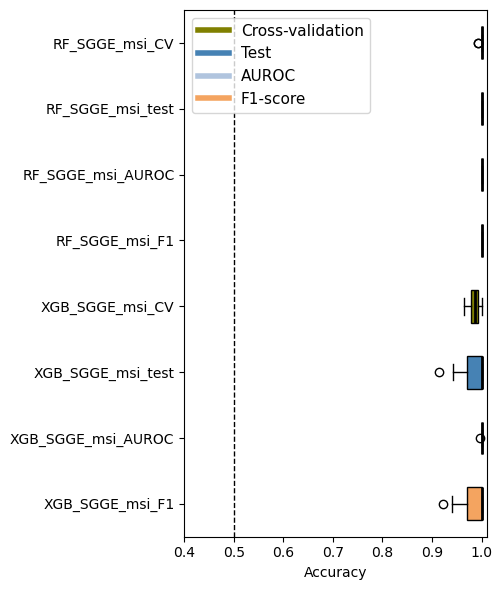

                Label  Median Value
0      RF_SGGE_msi_CV      1.000000
1    RF_SGGE_msi_test      1.000000
2   RF_SGGE_msi_AUROC      1.000000
3      RF_SGGE_msi_F1      1.000000
4     XGB_SGGE_msi_CV      0.985714
5   XGB_SGGE_msi_test      1.000000
6  XGB_SGGE_msi_AUROC      1.000000
7     XGB_SGGE_msi_F1      1.000000
Empty DataFrame
Columns: [Label, Median Value]
Index: []


In [19]:

df = SGGE_matrix.transpose()

train_color = 'olive' 
test_color = 'steelblue'
AUROC_color = 'lightsteelblue'
F1_color = 'sandybrown'
median_color = 'black'
median_linewidth = 2
label_fontsize = 10
legend_fontsize = 11

fig, ax = plt.subplots(figsize=(6, 6)) 

bp = ax.boxplot(df.values, vert=False, patch_artist=True)

median_values = []

# Color the boxplots and extract median values
for i, (patch, median) in enumerate(zip(bp['boxes'], bp['medians'])):
    label = SGGE_matrix.index[i]
    if 'test' in label.lower():
        patch.set_facecolor(test_color)
    elif 'f1' in label.lower():
        patch.set_facecolor(F1_color)
    elif 'auroc' in label.lower():
        patch.set_facecolor(AUROC_color)
    else:
        patch.set_facecolor(train_color)

    median.set_color(median_color)
    median.set_linewidth(median_linewidth)
    median_value = median.get_xdata()[1] 
    median_values.append(median_value)
    
ax.axvline(x=0.5, color='black', linestyle='--', linewidth=1)
ax.set_yticklabels(SGGE_matrix.index, fontsize=label_fontsize)
ax.set_xlim(0.4, 1.01)
ax.set_xlabel('Accuracy', fontsize=label_fontsize)
ax.invert_yaxis()

handles = [plt.Line2D([0], [0], color=train_color, lw=4),
           plt.Line2D([0], [0], color=test_color, lw=4),
           plt.Line2D([0], [0], color=AUROC_color, lw=4),
           plt.Line2D([0], [0], color=F1_color, lw=4)]
labels = ['Cross-validation', 'Test', 'AUROC', 'F1-score']
legend = ax.legend(handles, labels, loc='upper left',fontsize=legend_fontsize)

plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show()

median_df = pd.DataFrame({
    'Label': SGGE_matrix.index,
    'Median Value': median_values
})

pd.set_option('display.max_rows', None)

print(median_df[0:15])
print(median_df[15:32])